# Part 1

### Q1

In [3]:
#Import libraries
import numpy as np
import torch

In [27]:
#Initilising scaler tensors
c = torch.ones(1, requires_grad = False)
x = torch.ones(1, requires_grad = True)

#Defining t value
t = 2*x + c

#Defining the function y
y = 3*(t**2 + 2)**2
print(f'y = : {y.item()}')

#Computing dy/dx
y.backward()
print(f'dy/dx =  {x.grad.item()}')

# clear gradients
x.grad.data.zero_()

y = : 363.0
dy/dx =  792.0


### Q2

In [26]:
#Initilising scaler tensors
c = torch.ones(1, requires_grad = False)
x = torch.ones(1, requires_grad = True)

#Defining s value
s = 2*x

#Defining the function y
y = 3*(s**3 + s) + 2*c**4
print(f'y = : {y.item()}')

#Computing dy/dx
y.backward()
print(f'dy/dx =  {x.grad.item()}')

# clear gradients
x.grad.data.zero_()

y = : 32.0
dy/dx =  78.0


### Q3

In [25]:
#Initilising scaler tensors
c = torch.ones(1, requires_grad = False)
x = torch.ones(1, requires_grad = True)

#Defining value
q = 2*x + c
r = 2*q + 3
p = 2*r**3 + 3 * r
t = (p**2 + 2*p + 3)**2

#Defining the function y
y = 2*t + c
print(f'y = : {y.item()}')

#Computing dy/dx
y.backward()
print(f'dy/dx =  {x.grad.item()}')

# clear gradients
x.grad.data.zero_()

y = : 9752276893696.0
dy/dx =  51347072221184.0


### Q4

Attached the result in the Zip file.

# Part 2

In [4]:
import torch

class GradientDescent:
    """
    GradientDescent class apply the gradient descent algorithm for linear regression.
    Parameters:
    - x_data: The input data. (Type: torch.Tensor)
    - y_data: The predicted output data. (Type: torch.Tensor)
    - lr: The learning rate of the model. (optional, default=0.01)
    - no_iterations: The number of iterations to train the model. (optional, default=1000)
    """
    def __init__(self, x_data, y_data, lr=0.01, no_iterations=1000):
        self.x_data = x_data
        self.y_data = y_data
        self.lr = lr
        self.no_iterations = no_iterations
        self.a = torch.tensor(1.0, requires_grad=True)
        self.b = torch.tensor(1.0, requires_grad=True)

    def forward(self, x):
        """
        Computes the forward pass of the linear regression model.
        Parameter: 
        - x: The input data as a torch.Tensor.
        Returns: The predicted output of the linear regression model.
        """
        return torch.exp(-self.a * x) + 2 * self.a * x + self.b

    def Error(self):
        """
        Computes and Returns the mean squared error (MSE) of the linear regression model.
        """
        return torch.mean(torch.pow(self.forward(self.x_data) - self.y_data, 2))

    def optimizer(self):
        """
        Update the parameters using gradient descent algorithm.
        """
        with torch.no_grad():
            self.a -= self.lr * self.a.grad
            self.b -= self.lr * self.b.grad
            self.a.grad.zero_()
            self.b.grad.zero_()

    def train(self):
        """
        Trains the linear regression model using gradient descent.
        """
        for i in range(self.no_iterations):
            loss = self.Error()
            loss.backward()
            self.optimizer()

            # Print each 100th iteration
            if (i+1) % 100 == 0:
                print(f'Iteration No.[{i+1}], Loss: {loss.item()}')

        print(f'Optimized parameters: a = {self.a.item()}, b = {self.b.item()}')

In [5]:
# Input data
x_data = torch.tensor([-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
y_data = torch.tensor([6.255, 6.121, 6.005, 5.907, 5.825, 5.758, 5.704, 5.664, 5.636, 5.62, 5.614, 5.618, 5.631, 5.652, 5.682, 5.719, 5.763, 5.814, 5.87, 5.933, 6.0, 6.072, 6.149, 6.231, 6.316, 6.405, 6.497, 6.593, 6.691, 6.793, 6.897, 7.003, 7.112, 7.223, 7.335, 7.45, 7.566, 7.684, 7.804, 7.924])

# Initialize parameters (a and b)
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

no_iterations = 1000
lr = 0.01

# Create an instance of the GradientDescent class
gd = GradientDescent(x_data, y_data)

# Train the model
gd.train()

Iteration No.[100], Loss: 0.8032331466674805
Iteration No.[200], Loss: 0.1086350679397583
Iteration No.[300], Loss: 0.01996113732457161
Iteration No.[400], Loss: 0.00525839626789093
Iteration No.[500], Loss: 0.002566411392763257
Iteration No.[600], Loss: 0.0020579535048455
Iteration No.[700], Loss: 0.0019609665032476187
Iteration No.[800], Loss: 0.001942385919392109
Iteration No.[900], Loss: 0.001938830129802227
Iteration No.[1000], Loss: 0.001938146771863103
Optimized parameters: a = 0.6886922121047974, b = 4.952817916870117


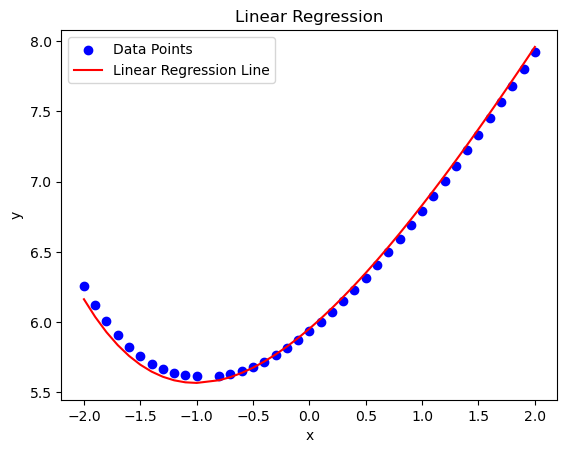

In [6]:
# Plot the data points and the linear regression line

import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(x_data, y_data, color='blue', label='Data Points')

# Plot the linear regression line
x_range = x_data
y_range = gd.forward(x_range)
plt.plot(x_range, y_range.detach().numpy(), color='red', label='Linear Regression Line')

# Visualize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

plt.show()